In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp
from linearmodels import PanelOLS

C:\Anaconda\lib\site-packages\linearmodels\panel\data.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Categorical, DataFrame, Index, MultiIndex, Panel, Series,


In [2]:
# Dataset for Q1
df = pd.read_stata('star_pset3.dta')
df.describe()

,stdntid,female,male,white,black,asian,hisp,natamer,other,whiteasian,...,gkschid,g1schid,g2schid,g3schid,schoolid,attrition,gk_avgpct_std,g1_avgpct_std,g2_avgpct_std,g3_avgpct_std
count,11601.000000,11581.000000,11581.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000,...,6325.000000,6829.000000,6840.000000,6802.000000,11601.000000,11601.000000,5.902000e+03,6.633000e+03,6.358000e+03,6.353000e+03
mean,15800.000000,0.471203,0.528797,0.627889,0.364524,0.002791,0.001831,0.001221,0.001744,0.630679,...,41.648379,41.235466,42.539912,42.482211,42.490475,0.429187,1.434066e-09,7.090014e-09,-1.093096e-08,9.325833e-09
std,3349.064571,0.499192,0.499192,0.483389,0.481317,0.052755,0.042757,0.034921,0.041728,0.482642,...,22.601678,23.178339,22.983230,23.129404,22.706431,0.494981,9.933691e-01,9.942527e-01,9.941626e-01,9.941585e-01
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-3.092051e+00,-3.074975e+00,-3.219170e+00,-3.106977e+00
25%,12900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,20.000000,21.000000,21.000000,22.000000,0.000000,-7.599800e-01,-7.689472e-01,-7.658954e-01,-7.912296e-01
50%,15800.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,42.000000,41.000000,44.000000,44.000000,44.000000,0.000000,5.449475e-03,2.180556e-03,1.070794e-02,-6.382079e-03
75%,18700.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,1.000000,7.698771e-01,7.806036e-01,7.684523e-01,7.907550e-01
max,21600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,1.000000,3.731377e+00,3.027397e+00,3.392184e+00,3.126610e+00


In [3]:
df.head()

,stdntid,female,male,race,white,black,asian,hisp,natamer,other,...,gkschid,g1schid,g2schid,g3schid,schoolid,attrition,gk_avgpct_std,g1_avgpct_std,g2_avgpct_std,g3_avgpct_std
0,19093,0.0,1.0,white,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,1.0,1.0,1,0,NaN,0.879735,0.278864,0.831494
1,21506,0.0,1.0,white,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,NaN,1,1,0.767294,-0.339024,NaN,NaN
2,17896,1.0,0.0,black,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,1,0,NaN,NaN,NaN,1.374154
3,16824,0.0,1.0,black,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,0,0.648646,1.129360,0.213187,0.946604
4,21229,1.0,0.0,asian,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,0,-0.597157,0.997205,0.541574,-0.204492


In [4]:
# 1 (K students)
df_reduced = df[df['study_entry'] == 'k'].dropna(subset = ['gkflunch', 'whiteasian', 'ageinyears', 'entry_assign', 'schoolid'])
print("\n\033[1mFree lunch:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'gkflunch ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mWhite/Asian:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'whiteasian ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAge in years:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'ageinyears ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAttrition rate:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'attrition ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))


Free lunch:
                      df       sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0     1.242975  0.621488  2.489194  0.083059
Residual         6293.0  1571.200322  0.249674       NaN       NaN

White/Asian:
                      df       sum_sq   mean_sq        F    PR(>F)
C(entry_assign)     2.0     0.592777  0.296388  1.34464  0.260708
Residual         6293.0  1387.116086  0.220422      NaN       NaN

Age in years:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    0.260798  0.130399  1.126403  0.324263
Residual         6293.0  728.513817  0.115766       NaN       NaN

Attrition rate:
                      df       sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0     1.772670  0.886335  3.549828  0.028787
Residual         6293.0  1571.261002  0.249684       NaN       NaN


In [5]:
# 1 (G1 students)
df_reduced = df[df['study_entry'] == '1'].dropna(subset = ['g1flunch', 'whiteasian', 'ageinyears', 'entry_assign', 'schoolid'])
print("\n\033[1mFree lunch:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'g1flunch ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mWhite/Asian:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'whiteasian ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAge in years:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'ageinyears ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAttrition rate:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'attrition ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))


Free lunch:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    0.331817  0.165909  0.697881  0.497749
Residual         2198.0  522.535062  0.237732       NaN       NaN

White/Asian:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    3.978860  1.989430  8.348505  0.000244
Residual         2198.0  523.778523  0.238298       NaN       NaN

Age in years:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    2.923894  1.461947  4.056535  0.017439
Residual         2198.0  792.143947  0.360393       NaN       NaN

Attrition rate:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    1.444206  0.722103  2.893878  0.055572
Residual         2198.0  548.462200  0.249528       NaN       NaN


In [6]:
# 1 (G2 students)
df_reduced = df[df['study_entry'] == '2'].dropna(subset = ['g2flunch', 'whiteasian', 'ageinyears', 'entry_assign', 'schoolid'])
print("\n\033[1mFree lunch:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'g2flunch ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mWhite/Asian:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'whiteasian ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAge in years:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'ageinyears ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAttrition rate:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'attrition ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))


Free lunch:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    0.373266  0.186633  0.811912  0.444202
Residual         1508.0  346.641955  0.229869       NaN       NaN

White/Asian:
                      df      sum_sq   mean_sq        F    PR(>F)
C(entry_assign)     2.0    3.983229  1.991614  8.05437  0.000332
Residual         1508.0  372.885070  0.247271      NaN       NaN

Age in years:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    0.694251  0.347126  0.803734  0.447846
Residual         1508.0  651.291994  0.431891       NaN       NaN

Attrition rate:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    0.140059  0.070030  0.333932  0.716156
Residual         1508.0  316.246440  0.209712       NaN       NaN


In [7]:
# 1 (G3 students)
df_reduced = df[df['study_entry'] == '3'].dropna(subset = ['g3flunch', 'whiteasian', 'ageinyears', 'entry_assign', 'schoolid'])
print("\n\033[1mFree lunch:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'g3flunch ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mWhite/Asian:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'whiteasian ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAge in years:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'ageinyears ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))
print("\n\033[1mAttrition rate:\033[0;0m\n", sm.stats.anova_lm(smf.ols(formula = 'attrition ~ C(entry_assign)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}), typ=1))


Free lunch:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    1.215471  0.607736  2.656884  0.070589
Residual         1172.0  268.083252  0.228740       NaN       NaN

White/Asian:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    2.847009  1.423504  5.935744  0.002723
Residual         1172.0  281.067885  0.239819       NaN       NaN

Age in years:
                      df      sum_sq   mean_sq         F    PR(>F)
C(entry_assign)     2.0    1.026672  0.513336  1.042361  0.352948
Residual         1172.0  577.180176  0.492475       NaN       NaN

Attrition rate:
                      df  sum_sq  mean_sq   F  PR(>F)
C(entry_assign)     2.0     0.0      0.0 NaN     NaN
Residual         1172.0     0.0      0.0 NaN     NaN


C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [8]:
#2 Attrition
print(smf.ols(formula = 'attrition ~ C(entry_assign)', data = df).fit(cov_type='cluster', cov_kwds={'groups': df['schoolid']}).summary())
# no significant difference

                            OLS Regression Results                            
Dep. Variable:              attrition   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.9899
Date:                Thu, 14 Nov 2019   Prob (F-statistic):              0.376
Time:                        08:39:09   Log-Likelihood:                -8301.3
No. Observations:               11601   AIC:                         1.661e+04
Df Residuals:                   11598   BIC:                         1.663e+04
Df Model:                           2                                         
Covariance Type:              cluster                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [9]:
#2 Attrition with covariates
print(smf.ols(formula = 'attrition ~ C(entry_assign) + C(female) + C(race) + ageinyears', data = df).fit(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:              attrition   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     82.85
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          9.69e-150
Time:                        08:39:11   Log-Likelihood:                -7987.8
No. Observations:               11433   AIC:                         1.600e+04
Df Residuals:                   11423   BIC:                         1.607e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [10]:
# 3 grade K
print("\n\033[1mGrade K:\033[0;0m\n", smf.ols(formula = 'gkclasssize ~ C(entry_assign)', data = df).fit(cov_type='HC3').summary())
print("\n\033[1mGrade 1:\033[0;0m\n", smf.ols(formula = 'g1classsize ~ C(entry_assign)', data = df).fit(cov_type='HC3').summary())
print("\n\033[1mGrade 2:\033[0;0m\n", smf.ols(formula = 'g2classsize ~ C(entry_assign)', data = df).fit(cov_type='HC3').summary())
print("\n\033[1mGrade 3:\033[0;0m\n", smf.ols(formula = 'g3classsize ~ C(entry_assign)', data = df).fit(cov_type='HC3').summary())


Grade K:
                             OLS Regression Results                            
Dep. Variable:            gkclasssize   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Thu, 14 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:39:11   Log-Likelihood:                -13445.
No. Observations:                6325   AIC:                         2.690e+04
Df Residuals:                    6322   BIC:                         2.692e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Int

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Kindergarten Test Score Distribution and Class size')

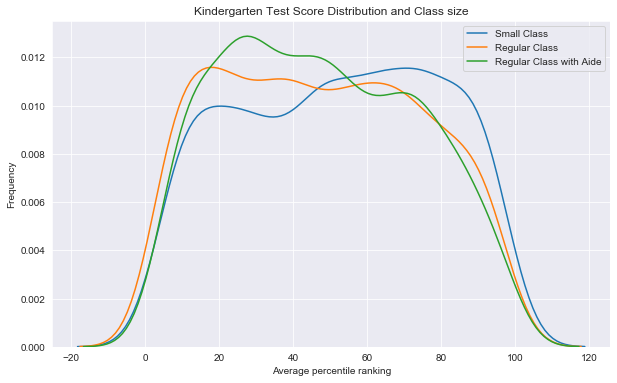

In [11]:
# 4a
# Grade K
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['gk_avgpct'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['gk_avgpct'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['gk_avgpct'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Kindergarten Test Score Distribution and Class size")

Text(0.5, 1.0, 'Grade 1 Test Score Distribution and Class size')

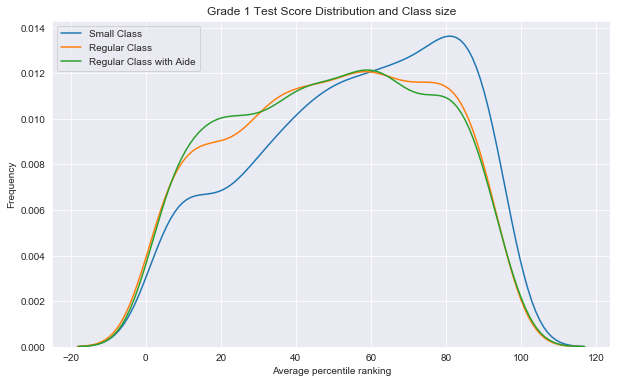

In [12]:
# Grade 1
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['g1_avgpct'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['g1_avgpct'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['g1_avgpct'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Grade 1 Test Score Distribution and Class size")

Text(0.5, 1.0, 'Grade 2 Test Score Distribution and Class size')

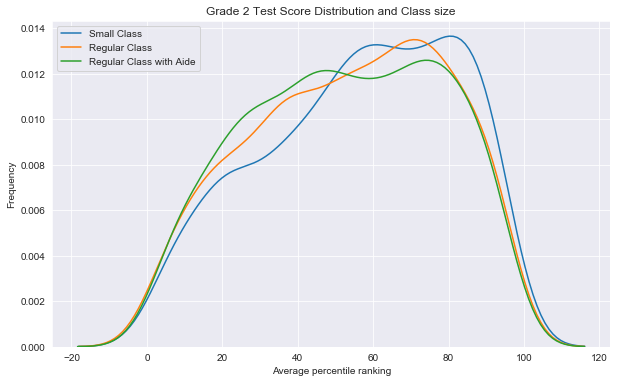

In [13]:
# Grade 2
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['g2_avgpct'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['g2_avgpct'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['g2_avgpct'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Grade 2 Test Score Distribution and Class size")

Text(0.5, 1.0, 'Grade 3 Test Score Distribution and Class size')

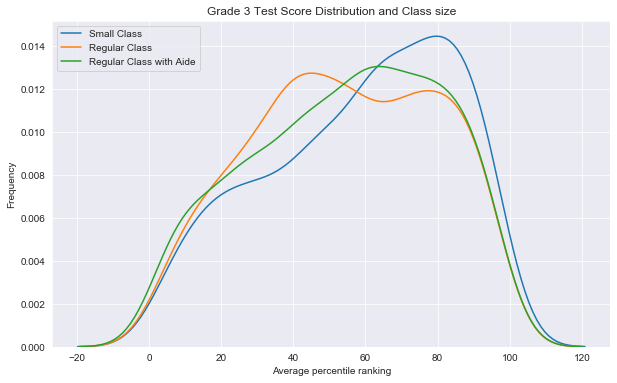

In [14]:
# Grade 3
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['g3_avgpct'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['g3_avgpct'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['g3_avgpct'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Grade 3 Test Score Distribution and Class size")

In [15]:
#4b
df_reduced = df[df['study_entry'] == 'k'].dropna(subset = ['gk_avgpct', 'g1_avgpct', 'g2_avgpct', 'g3_avgpct', 'race', 'female', 'gkflunch', 'gktchmasters'])
print("\n\033[1mKindergarten test scores:\033[0;0m\n", smf.ols(formula = 'gk_avgpct ~ C(entry_assign) + C(race) + C(female) + C(gkflunch) + C(gktchmasters)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}).summary())
print("\n\033[1mGrade 1 test scores:\033[0;0m\n", smf.ols(formula = 'g1_avgpct ~ C(entry_assign) + C(race) + C(female) + C(gkflunch) + C(gktchmasters)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}).summary())
print("\n\033[1mGrade 2 test scores:\033[0;0m\n", smf.ols(formula = 'g2_avgpct ~ C(entry_assign) + C(race) + C(female) + C(gkflunch) + C(gktchmasters)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}).summary())
print("\n\033[1mGrade 3 test scores:\033[0;0m\n", smf.ols(formula = 'g3_avgpct ~ C(entry_assign) + C(race) + C(female) + C(gkflunch) + C(gktchmasters)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}).summary())

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)



Kindergarten test scores:
                             OLS Regression Results                            
Dep. Variable:              gk_avgpct   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           5.63e-24
Time:                        08:39:16   Log-Likelihood:                -12535.
No. Observations:                2736   AIC:                         2.509e+04
Df Residuals:                    2726   BIC:                         2.515e+04
Df Model:                           9                                         
Covariance Type:              cluster                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


In [16]:
#5 grade K, race
df_reduced = df[df['study_entry'] == 'k'].dropna(subset = ['gk_avgpct', 'g1_avgpct', 'g2_avgpct', 'g3_avgpct', 'race', 'female', 'gkflunch', 'gktchmasters'])
print(smf.ols(formula = 'gk_avgpct ~ C(entry_assign) * C(race) + C(female) + C(gkflunch) + C(gktchmasters)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}).summary())

                            OLS Regression Results                            
Dep. Variable:              gk_avgpct   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     68.48
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.30e-35
Time:                        08:39:17   Log-Likelihood:                -12533.
No. Observations:                2736   AIC:                         2.510e+04
Df Residuals:                    2721   BIC:                         2.518e+04
Df Model:                          14                                         
Covariance Type:              cluster                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 12
  'rank is %d' % (J, J_), ValueWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [17]:
#5 grade K, poor
df_reduced = df[df['study_entry'] == 'k'].dropna(subset = ['gk_avgpct', 'g1_avgpct', 'g2_avgpct', 'g3_avgpct', 'race', 'female', 'gkflunch', 'gktchmasters'])
print(smf.ols(formula = 'gk_avgpct ~ C(entry_assign) * C(gkflunch) + C(race) + C(female) + C(gktchmasters)', data = df_reduced).fit(cov_type='cluster', cov_kwds={'groups': df_reduced['schoolid']}).summary())

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
  'rank is %d' % (J, J_), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:              gk_avgpct   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     30.42
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.94e-23
Time:                        08:39:17   Log-Likelihood:                -12535.
No. Observations:                2736   AIC:                         2.509e+04
Df Residuals:                    2724   BIC:                         2.516e+04
Df Model:                          11                                         
Covariance Type:              cluster                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [18]:
#df.groupby('schoolid').transform(lambda x: (x - x.mean()) / x.std())

In [19]:
df.head()

,stdntid,female,male,race,white,black,asian,hisp,natamer,other,...,gkschid,g1schid,g2schid,g3schid,schoolid,attrition,gk_avgpct_std,g1_avgpct_std,g2_avgpct_std,g3_avgpct_std
0,19093,0.0,1.0,white,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,1.0,1.0,1,0,NaN,0.879735,0.278864,0.831494
1,21506,0.0,1.0,white,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,NaN,1,1,0.767294,-0.339024,NaN,NaN
2,17896,1.0,0.0,black,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,1,0,NaN,NaN,NaN,1.374154
3,16824,0.0,1.0,black,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,0,0.648646,1.129360,0.213187,0.946604
4,21229,1.0,0.0,asian,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1,0,-0.597157,0.997205,0.541574,-0.204492


In [20]:
# normalizing test scores within each school
#foreach var of varlist g*avgpct {
#	bysort schoolid: egen `var'_mean= mean(`var')
#	bysort schoolid: egen `var'_sd = sd(`var')
#	bysort schoolid: gen `var'_std = (`var'-`var'_mean)/`var'_sd
#}

Text(0.5, 1.0, 'Kindergarten Test Score Distribution and Class size')

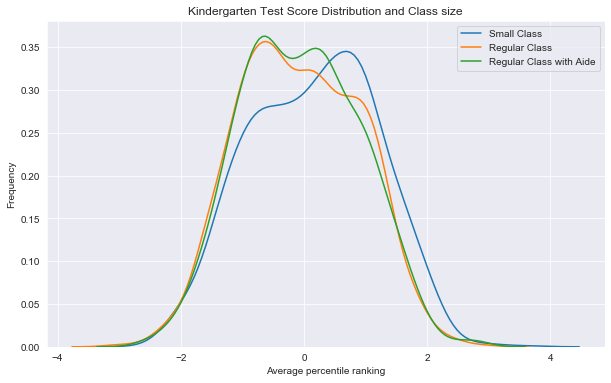

In [21]:
# Grade K
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['gk_avgpct_std'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['gk_avgpct_std'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['gk_avgpct_std'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Kindergarten Test Score Distribution and Class size")

Text(0.5, 1.0, 'Grade 1 Test Score Distribution and Class size')

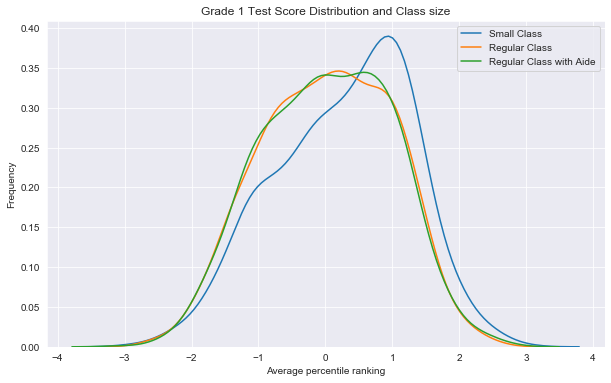

In [22]:
# Grade 1
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['g1_avgpct_std'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['g1_avgpct_std'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['g1_avgpct_std'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Grade 1 Test Score Distribution and Class size")

Text(0.5, 1.0, 'Grade 2 Test Score Distribution and Class size')

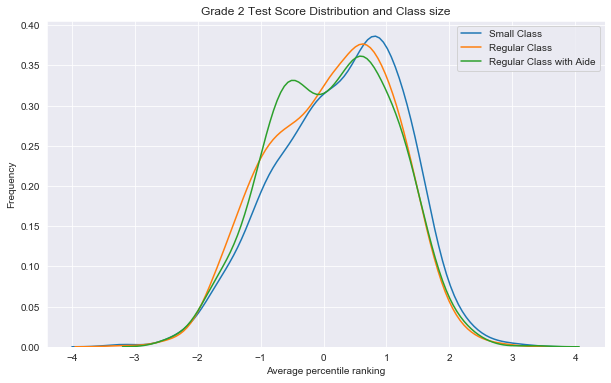

In [23]:
# Grade 2
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['g2_avgpct_std'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['g2_avgpct_std'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['g2_avgpct_std'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Grade 2 Test Score Distribution and Class size")

Text(0.5, 1.0, 'Grade 3 Test Score Distribution and Class size')

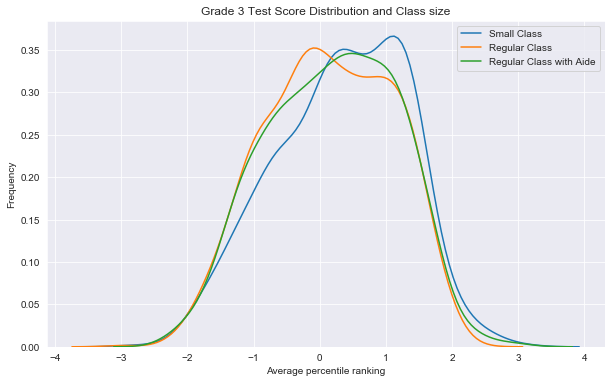

In [24]:
# Grade 3
df_reduced = df[df['study_entry'] == 'k']
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'small']['g3_avgpct_std'], hist = False, label = "Small Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg']['g3_avgpct_std'], hist = False, label = "Regular Class")
sns.distplot(df_reduced[df_reduced['entry_assign'] == 'reg w/aide']['g3_avgpct_std'], hist = False, label = "Regular Class with Aide")
plt.xlabel("Average percentile ranking")
plt.ylabel("Frequency")
plt.title("Grade 3 Test Score Distribution and Class size")